In [1]:
import yfinance as yf

gold_data = yf.download("GC=F", start="2001-01-01", end="2023-03-30")
print("Gold dataset\n", gold_data)

[*********************100%***********************]  1 of 1 completed
Gold dataset
                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-01-02   268.399994   268.399994   268.399994   268.399994   268.399994   
2001-01-03   268.000000   268.000000   268.000000   268.000000   268.000000   
2001-01-04   267.299988   267.299988   267.299988   267.299988   267.299988   
2001-01-05   268.000000   268.000000   268.000000   268.000000   268.000000   
2001-01-08   268.000000   268.000000   268.000000   268.000000   268.000000   
...                 ...          ...          ...          ...          ...   
2023-03-23  1990.500000  1994.599976  1990.500000  1993.800049  1993.800049   
2023-03-24  1991.699951  1995.400024  1982.099976  1982.099976  1982.099976   
2023-03-27  1957.199951  1957.199951  1952.400024  1952.400024  1952.400024   
2023-03-28  1972.400024  1972.400024  1972.40002

In [2]:
import pandas as pd

gold_df = pd.DataFrame(gold_data)
print("Gold\n",gold_df)

Gold
                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-01-02   268.399994   268.399994   268.399994   268.399994   268.399994   
2001-01-03   268.000000   268.000000   268.000000   268.000000   268.000000   
2001-01-04   267.299988   267.299988   267.299988   267.299988   267.299988   
2001-01-05   268.000000   268.000000   268.000000   268.000000   268.000000   
2001-01-08   268.000000   268.000000   268.000000   268.000000   268.000000   
...                 ...          ...          ...          ...          ...   
2023-03-23  1990.500000  1994.599976  1990.500000  1993.800049  1993.800049   
2023-03-24  1991.699951  1995.400024  1982.099976  1982.099976  1982.099976   
2023-03-27  1957.199951  1957.199951  1952.400024  1952.400024  1952.400024   
2023-03-28  1972.400024  1972.400024  1972.400024  1972.400024  1972.400024   
2023-03-29  1966.099976  1966.099976  1966.099

In [3]:
gold_df.to_csv('GoldPrice.csv')
gold_df = pd.read_csv('GoldPrice.csv')

In [4]:
gold_df = gold_df[['Date','Close']]
print("Gold\n",gold_df)

Gold
             Date        Close
0     2001-01-02   268.399994
1     2001-01-03   268.000000
2     2001-01-04   267.299988
3     2001-01-05   268.000000
4     2001-01-08   268.000000
...          ...          ...
5577  2023-03-23  1993.800049
5578  2023-03-24  1982.099976
5579  2023-03-27  1952.400024
5580  2023-03-28  1972.400024
5581  2023-03-29  1966.099976

[5582 rows x 2 columns]


In [5]:
gold_df['Date']
print("Gold\n",gold_df)

Gold
             Date        Close
0     2001-01-02   268.399994
1     2001-01-03   268.000000
2     2001-01-04   267.299988
3     2001-01-05   268.000000
4     2001-01-08   268.000000
...          ...          ...
5577  2023-03-23  1993.800049
5578  2023-03-24  1982.099976
5579  2023-03-27  1952.400024
5580  2023-03-28  1972.400024
5581  2023-03-29  1966.099976

[5582 rows x 2 columns]


In [6]:
import datetime

def str_to_datetime(s):
    if isinstance(s, datetime.datetime):
        return s
    else:
        s = str(s)
        split = s.split('-')
        year, month, day = int(split[0]), int(split[1]), int(split[2])
        return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('2001-01-02')
datetime_object

datetime.datetime(2001, 1, 2, 0, 0)

In [7]:
gold_df['Date'] = gold_df['Date'].apply(str_to_datetime)
print("gold_date\n",gold_df['Date'])

gold_date
 0      2001-01-02
1      2001-01-03
2      2001-01-04
3      2001-01-05
4      2001-01-08
          ...    
5577   2023-03-23
5578   2023-03-24
5579   2023-03-27
5580   2023-03-28
5581   2023-03-29
Name: Date, Length: 5582, dtype: datetime64[ns]


In [8]:
gold_df.index = gold_df.pop('Date')
print("Gold\n",gold_df)

Gold
                   Close
Date                   
2001-01-02   268.399994
2001-01-03   268.000000
2001-01-04   267.299988
2001-01-05   268.000000
2001-01-08   268.000000
...                 ...
2023-03-23  1993.800049
2023-03-24  1982.099976
2023-03-27  1952.400024
2023-03-28  1972.400024
2023-03-29  1966.099976

[5582 rows x 1 columns]


In [9]:
print("Gold\n",gold_df.shape)

Gold
 (5582, 1)


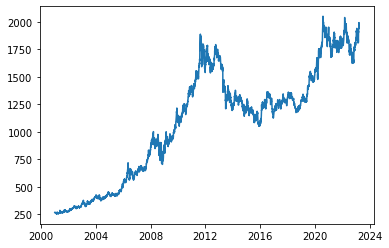

In [10]:
import matplotlib.pyplot as plt
plt.plot(gold_df)

In [11]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
gold_df = scaler.fit_transform(np.array(gold_df).reshape(-1,1))
print("Gold\n",gold_df)

Gold
 [[0.00740369]
 [0.00718103]
 [0.00679135]
 ...
 [0.94483413]
 [0.9559675 ]
 [0.95246046]]


In [45]:
train_2 = int(len(gold_df)*0.75)
test_2 = len(gold_df) - train_2

train_2data, test_2data = gold_df[0:train_2,:],gold_df[train_2:len(gold_df),:1]

In [46]:
print(len(train_2data), len(test_2data))

4186 1396


In [47]:

def create_dataset2(gold_df1, time_step = 1):
    G_dataX, G_dataY  = [], []
    for i in range(len(gold_df1)-time_step):
        a = gold_df[i:(i+time_step), 0]
        aa = np.round(a, 5)
        G_dataX.append(aa)
        G_dataY.append(gold_df1[i+time_step, 0])
    return np.array(G_dataX, dtype=object), np.array(G_dataY, dtype=object)

In [48]:
time_step = 365

X_train_Gold, Y_train_Gold = create_dataset2(train_2data, time_step)
X_test_Gold, Y_test_Gold = create_dataset2(test_2data, time_step)

In [49]:
print(X_train_Gold.shape)
print(X_test_Gold.shape)

(3821, 365)
(1031, 365)


In [50]:
X_train_Gold = X_train_Gold.reshape(X_train_Gold.shape[0],X_train_Gold.shape[1] , 1)
X_test_Gold = X_test_Gold.reshape(X_test_Gold.shape[0],X_test_Gold.shape[1] , 1)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [52]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(365,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 365, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 365, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [54]:
X_train_Gold = np.asarray(X_train_Gold).astype(np.float32)
Y_train_Gold = np.asarray(Y_train_Gold).astype(np.float32)
X_test_Gold = np.asarray(X_test_Gold).astype(np.float32)
Y_test_Gold = np.asarray(Y_test_Gold).astype(np.float32)



In [55]:
Gold_model = model.fit(X_train_Gold,Y_train_Gold,validation_data=(X_test_Gold,Y_test_Gold),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
60/60 [==============================] - 202s 2s/step - loss: 0.0145 - val_loss: 0.5382
Epoch 2/50
60/60 [==============================] - 123s 2s/step - loss: 4.3085e-04 - val_loss: 0.5267
Epoch 3/50
60/60 [==============================] - 124s 2s/step - loss: 4.5212e-04 - val_loss: 0.5238
Epoch 4/50
60/60 [==============================] - 114s 2s/step - loss: 4.0715e-04 - val_loss: 0.5241
Epoch 5/50
60/60 [==============================] - 107s 2s/step - loss: 4.0417e-04 - val_loss: 0.5249
Epoch 6/50
60/60 [==============================] - 108s 2s/step - loss: 4.0108e-04 - val_loss: 0.5199
Epoch 7/50
60/60 [==============================] - 106s 2s/step - loss: 3.7826e-04 - val_loss: 0.5221
Epoch 8/50
60/60 [==============================] - 107s 2s/step - loss: 3.8105e-04 - val_loss: 0.5246
Epoch 9/50
60/60 [==============================] - 108s 2s/step - loss: 3.5577e-04 - val_loss: 0.5268
Epoch 10/50
60/60 [==============================] - 109s 2s/step - loss: 3.3

In [56]:
import tensorflow as tf

In [57]:
Goldtrain_predict = model.predict(X_train_Gold)
Goldtest_predict = model.predict(X_test_Gold)

33/33 [==============================] - 8s 227ms/step


In [58]:
Goldtrain_predict = scaler.inverse_transform(Goldtrain_predict)
Goldtest_predict = scaler.inverse_transform(Goldtest_predict)

In [59]:
import math
from sklearn.metrics import mean_squared_error

Gold_trainmse = math.sqrt(mean_squared_error(Y_train_Gold, Goldtrain_predict))
print(Gold_trainmse)
Gold_testmse = math.sqrt(mean_squared_error(Y_test_Gold, Goldtest_predict))
print(Gold_testmse)

1069.429754588865
433.0012088608991


In [60]:
gold_df.shape
Goldtrain_predict.shape
Goldtest_predict.shape

(1031, 1)

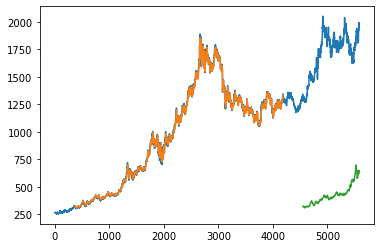

In [61]:
import numpy
time_steps = 365

Goldtrainpredict = numpy.empty_like(gold_df)
Goldtrainpredict[:, :] = np.nan
Goldtrainpredict[time_steps:len(Goldtrain_predict)+time_steps, :] = Goldtrain_predict

Goldtestpredict = numpy.empty_like(gold_df)
Goldtestpredict[:, :] = np.nan
Goldtestpredict[len(Goldtrain_predict)+(time_steps*2):len(gold_df), :] = Goldtest_predict

plt.plot(scaler.inverse_transform(gold_df))
plt.plot(Goldtrainpredict)
plt.plot(Goldtestpredict)
plt.show()

In [62]:
print(len(test_2data))

1396


In [63]:
Gold_input = test_2data[1031:].reshape(1,-1)
Gold_input.shape

(1, 365)

In [64]:
Goldtemp_input = list(Gold_input)
Goldtemp_input = Goldtemp_input[0].tolist()

In [65]:
from numpy import array 

Gold_output = []
n_steps = 365
i = 0
while(i<365):
    if(len(Goldtemp_input)>365):
        Gold_input = np.array(Goldtemp_input[1:])
        print("{} day input {}".format(i,Gold_input))
        Gold_input = Gold_input.reshape(1,-1)
        Gold_input = Gold_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(Gold_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        Goldtemp_input.extend(yhat[0].tolist())
        Goldtemp_input = Goldtemp_input[1:]
        
        Gold_output.extend(yhat.tolist())
        i = i+1
    
    else:
        Gold_input = Gold_input.reshape((1, n_steps, 1))
        yhat = model.predict(Gold_input, verbose=0)
        print(yhat[0])
        Goldtemp_input.extend(yhat[0].tolist())
        print(len(Goldtemp_input))
        Gold_output.extend(yhat.tolist())
        i = i+1

print(Gold_output)

[0.9438205]
366
1 day input [0.85114672 0.84953237 0.85749276 0.86333779 0.85593406 0.85882878
 0.86088843 0.8505344  0.85727008 0.85370739 0.83973501 0.85610109
 0.86912716 0.87525051 0.87680915 0.8864952  0.89517922 0.8977956
 0.89679357 0.88983521 0.89879757 0.89395458 0.88849919 0.86333779
 0.85081274 0.85114672 0.85521043 0.85181477 0.85014476 0.8453017
 0.84975505 0.83812066 0.84997773 0.84747272 0.85031172 0.85075708
 0.84585837 0.85047875 0.85237144 0.84352039 0.83917834 0.85810509
 0.86211314 0.85649073 0.85326209 0.86088843 0.86623244 0.86450678
 0.86567577 0.86283677 0.86706744 0.87530617 0.85966379 0.86779114
 0.87369181 0.85370739 0.85832777 0.85910712 0.8703518  0.87513914
 0.87179913 0.86918281 0.86684483 0.88399019 0.8836562  0.87769987
 0.88321084 0.8893342  0.87664219 0.85626812 0.85159209 0.85721443
 0.8601648  0.8651191  0.86166778 0.86367177 0.87146514 0.87480515
 0.87959249 0.88014916 0.88270989 0.89785126 0.89050326 0.8990759
 0.9160543  0.91488531 0.91906033 0.9

In [66]:
Gold_new = np.arange(1,366)
Gold_pred = np.arange(366,732)

In [67]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Gold_original = scaler.inverse_transform(Gold_output)
Gold = pd.DataFrame(Gold_original)

Gold.columns = ['GP_predict']
print(Gold)

      GP_predict
0    1950.579104
1    1944.237874
2    1935.565861
3    1925.945924
4    1916.141070
..           ...
360  1125.635457
361  1124.982949
362  1124.332422
363  1123.684840
364  1123.039506

[365 rows x 1 columns]


In [68]:
Gold_date = pd.DataFrame({'date': pd.date_range(start = '2023-03-30', end = '2024-03-28')}) 
print(Gold_date)

          date
0   2023-03-30
1   2023-03-31
2   2023-04-01
3   2023-04-02
4   2023-04-03
..         ...
360 2024-03-24
361 2024-03-25
362 2024-03-26
363 2024-03-27
364 2024-03-28

[365 rows x 1 columns]


In [69]:
GP_forecast = pd.concat([Gold_date, Gold],axis=1,join='outer')
GP_forecast

,date,GP_predict
0,2023-03-30,1950.579104
1,2023-03-31,1944.237874
2,2023-04-01,1935.565861
3,2023-04-02,1925.945924
4,2023-04-03,1916.141070
...,...,...
360,2024-03-24,1125.635457
361,2024-03-25,1124.982949
362,2024-03-26,1124.332422
363,2024-03-27,1123.684840


In [70]:
d1 = str_to_datetime('2023-03-29')
d2 = str_to_datetime('2023-11-15')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 231 days
Number of days: 231


In [71]:
GP_forecast.iloc[(delta_intr-1)]

date          2023-11-15 00:00:00
GP_predict            1239.627706
Name: 230, dtype: object

In [72]:
for i in range(delta_intr):
    print(GP_forecast.iloc[i])

date          2023-03-30 00:00:00
GP_predict            1950.579104
Name: 0, dtype: object
date          2023-03-31 00:00:00
GP_predict            1944.237874
Name: 1, dtype: object
date          2023-04-01 00:00:00
GP_predict            1935.565861
Name: 2, dtype: object
date          2023-04-02 00:00:00
GP_predict            1925.945924
Name: 3, dtype: object
date          2023-04-03 00:00:00
GP_predict             1916.14107
Name: 4, dtype: object
date          2023-04-04 00:00:00
GP_predict            1906.406565
Name: 5, dtype: object
date          2023-04-05 00:00:00
GP_predict            1896.781167
Name: 6, dtype: object
date          2023-04-06 00:00:00
GP_predict            1887.258346
Name: 7, dtype: object
date          2023-04-07 00:00:00
GP_predict            1877.842813
Name: 8, dtype: object
date          2023-04-08 00:00:00
GP_predict            1868.549451
Name: 9, dtype: object
date          2023-04-09 00:00:00
GP_predict            1859.399889
Name: 10, dtype: objec

In [73]:
import pickle

file = 'GoldPrice_final.sav'
pickle.dump(Gold_model,open(file,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-28 13:08:26         3474
metadata.json                                  2023-04-28 13:08:26      

In [74]:
model = pickle.load(open('GoldPrice_final.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-28 13:08:26         3474
metadata.json                                  2023-04-28 13:08:26           64
variables.h5                                   2023-04-28 13:08:26       643480
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [75]:

d1 = str_to_datetime('2023-03-29')
d2 = str_to_datetime('2023-07-15')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 108 days
Number of days: 108


In [76]:
GP_forecast.iloc[(delta_intr-1)]

date          2023-07-15 00:00:00
GP_predict            1449.879714
Name: 107, dtype: object

In [77]:
for i in range(delta_intr):
    print(GP_forecast.iloc[i])

date          2023-03-30 00:00:00
GP_predict            1950.579104
Name: 0, dtype: object
date          2023-03-31 00:00:00
GP_predict            1944.237874
Name: 1, dtype: object
date          2023-04-01 00:00:00
GP_predict            1935.565861
Name: 2, dtype: object
date          2023-04-02 00:00:00
GP_predict            1925.945924
Name: 3, dtype: object
date          2023-04-03 00:00:00
GP_predict             1916.14107
Name: 4, dtype: object
date          2023-04-04 00:00:00
GP_predict            1906.406565
Name: 5, dtype: object
date          2023-04-05 00:00:00
GP_predict            1896.781167
Name: 6, dtype: object
date          2023-04-06 00:00:00
GP_predict            1887.258346
Name: 7, dtype: object
date          2023-04-07 00:00:00
GP_predict            1877.842813
Name: 8, dtype: object
date          2023-04-08 00:00:00
GP_predict            1868.549451
Name: 9, dtype: object
date          2023-04-09 00:00:00
GP_predict            1859.399889
Name: 10, dtype: objec